In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np


In [5]:
#Read the CSV
df = pd.read_csv("../src/raw_analyst_ratings.csv")
print(df.head())


Descriptive Statistics:



In [18]:
# Calculate headline lengths
df['headline_length'] = df['headline'].apply(len)

# Get basic statistics
stats = df['headline_length'].describe()
print(stats)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [19]:
# Count articles per publisher
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


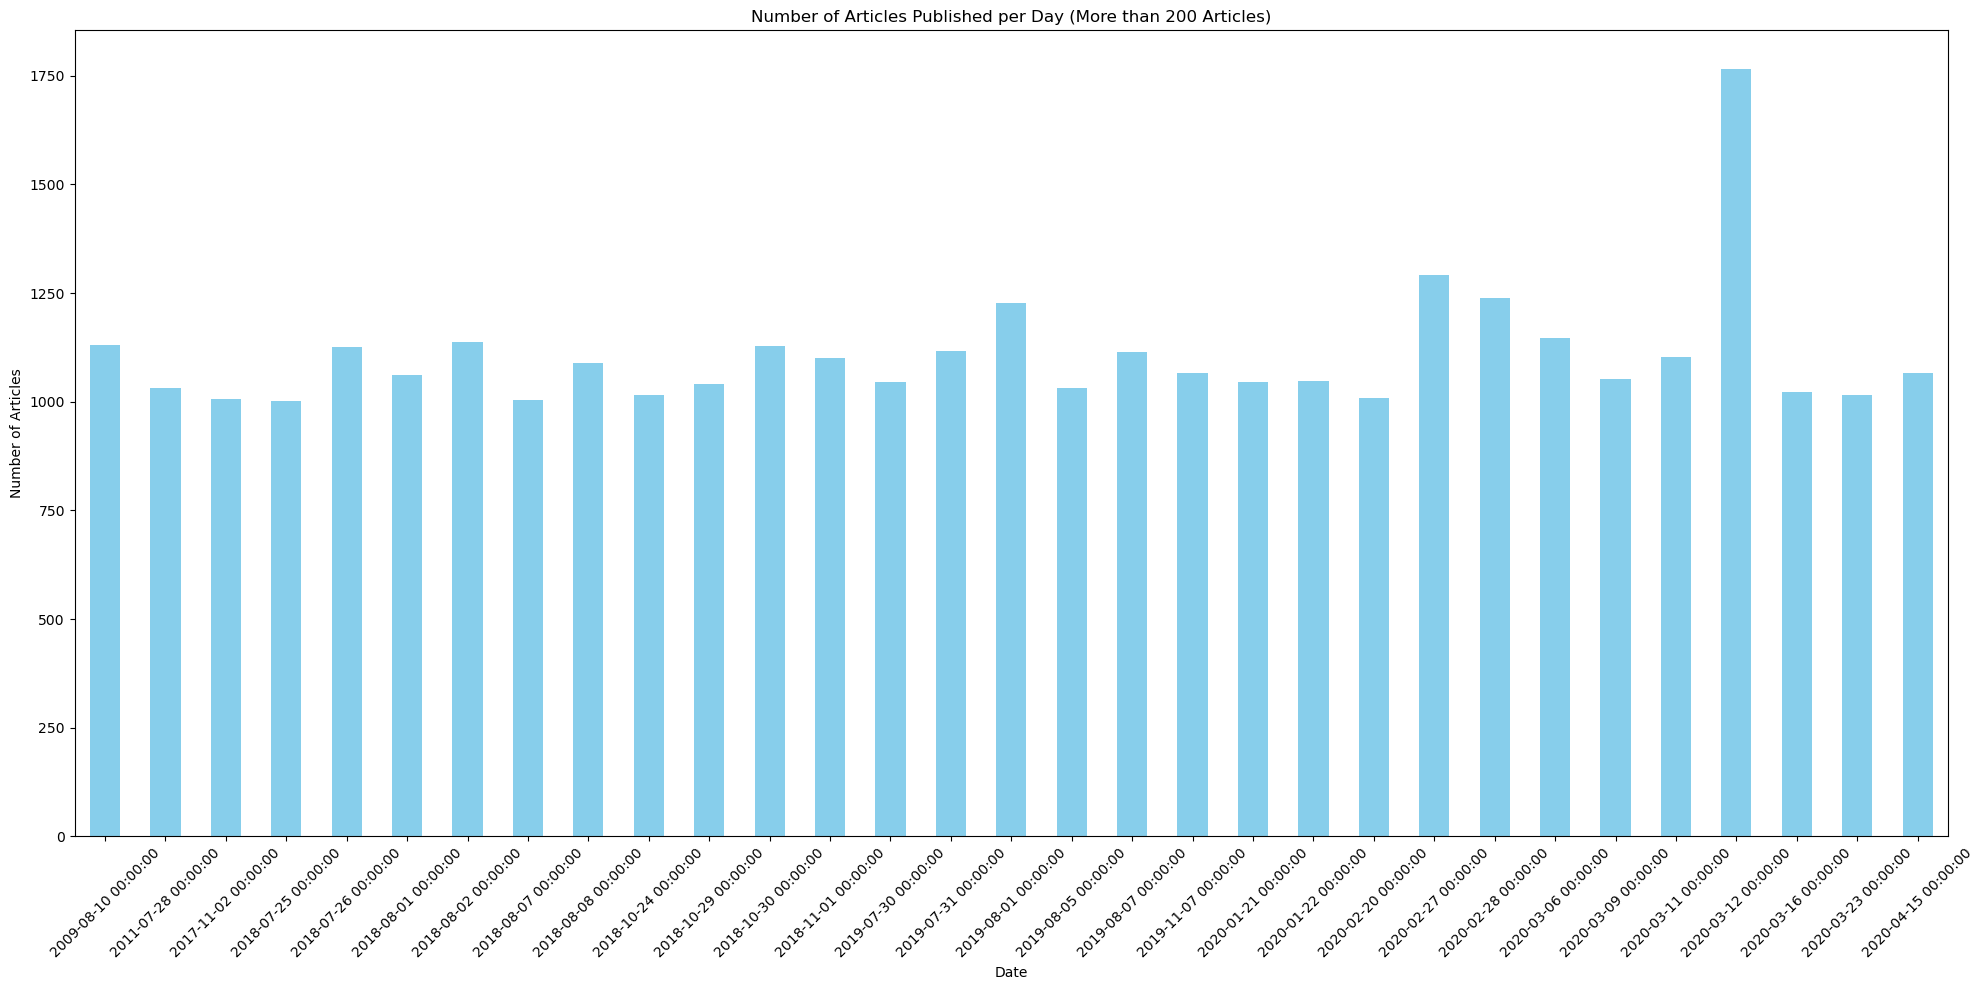

In [39]:
# Count number of articles per day
daily_counts = df['date'].value_counts().sort_index()

# Filter to show only dates with more than 1000 articles
filtered_counts = daily_counts[daily_counts >1000]

# Plotting
plt.figure(figsize=(20, 10))
filtered_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Articles Published per Day (More than 1000 Articles)')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text Analysis(Sentiment analysis & Topic Modeling)

In [40]:

nltk.download('vader_lexicon')
sentiment_data=df.copy()
sia = SentimentIntensityAnalyzer()





[nltk_data] Downloading package vader_lexicon to C:\Users\King
[nltk_data]     Betse\AppData\Roaming\nltk_data...


In [44]:
# Calculate the sentiment of the headlines
sentiment_data['sentiment'] = sentiment_data['headline'].apply(lambda x: sia.polarity_scores(text=x)['compound'])
sentiment_data

,Unnamed: 0,headline,url,publisher,date,stock,sentiment,sentiment_category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.2960,Neutral
...,...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,0.2023,Neutral
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,-0.3818,Negative
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,0.0000,Neutral
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,0.0000,Neutral


In [47]:
# Categorize the sentiment scores
sentiment_data['sentiment_category'] = pd.cut(sentiment_data['sentiment'], bins=[-1, -0.5, -0.0001, 0.5, 1], labels=['Very Negative', 'Negative', 'Neutral', 'Positive'])
sentiment_data

,Unnamed: 0,headline,url,publisher,date,stock,sentiment,sentiment_category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.2960,Neutral
...,...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,0.2023,Neutral
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,-0.3818,Negative
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,0.0000,Neutral
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,0.0000,Neutral


In [48]:
sentiment_data['sentiment_category'].value_counts()

sentiment_category
Neutral          1070915
Negative          182864
Positive          109718
Very Negative      43831
Name: count, dtype: int64

In [49]:
# from sklearn.feature_extraction.text import CountVectorizer
# from nltk.corpus import stopwords

# # Download NLTK resources
# nltk.download('stopwords')
# nltk.download('punkt')

# stop_words = set(stopwords.words('english'))

# # Function to clean and tokenize
# def clean_and_tokenize(text):
#     tokens = nltk.word_tokenize(text.lower())
#     return [word for word in tokens if word.isalnum() and word not in stop_words]

# # Apply tokenization
# df['tokens'] = df['headline'].apply(clean_and_tokenize)

# # Extract keywords using CountVectorizer
# vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)
# X = vectorizer.fit_transform(df['tokens'])

# # Sum up the counts of each vocabulary word
# keyword_counts = X.sum(axis=0)
# keywords = vectorizer.get_feature_names_out()

# # Create a DataFrame for the keywords and their counts
# keyword_df = pd.DataFrame({'keyword': keywords, 'count': keyword_counts.A1})
# keyword_df = keyword_df.sort_values(by='count', ascending=False)

# # Display the top keywords
# print(keyword_df.head(10))

[nltk_data] Downloading package stopwords to C:\Users\King
[nltk_data]     Betse\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\King
[nltk_data]     Betse\AppData\Roaming\nltk_data...


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = "../src/raw_analyst_ratings.csv"
data = pd.read_csv(file_path, parse_dates=['date'])

print(data)



         Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  \
0        https://www.benzinga.

In [10]:
data['date'] = pd.to_datetime(data['date'])
print(data['data'])

ValueError: time data "2020-05-22 00:00:00" doesn't match format "%Y-%m-%d %H:%M:%S%z", at position 10. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Time Series Analysis

In [7]:
# Ensure the 'date' column is in datetime format

# Count article headlines per day
daily_headlines = data.groupby(data['date'].dt.date).size()

# Create a DataFrame for time series analysis
time_series_data = pd.DataFrame({'date': daily_headlines.index, 'Headlines_Count': daily_headlines.values})
time_series_data.set_index('date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=7)

# Plotting the components
plt.figure(figsize=(14, 10))

# Original Data
plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.title('Original Headlines Count')
plt.legend(loc='upper left')

# Trend Component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend(loc='upper left')

# Seasonal Component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

# Residual Component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Analysis of publishing times
data['hour'] = data['date'].dt.hour
hourly_counts = data.groupby('hour').size()

# Plotting publication times
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar', color='salmon')
plt.title('Publication Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

ValueError: time data "2020-05-22 00:00:00" doesn't match format "%Y-%m-%d %H:%M:%S%z", at position 10. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.